# New Method

In [108]:
import math
import seaborn as sns
class Roller:
    def __init__(self, TOTAL_LENGTH, OUTER_DIAMETER, INNER_DIAMETER):
        self.TIME_START = 7  # Morning start hour
        self.TIME_END = 19   # Evening stop hour

        self.ROLLOUT_INTERVAL = 1  # Interval between rollouts, minutes
        self.ROLLOUT_SPEED = 15    # mm per sec
        self.ROLLOUT_LENGTH = 900  # mm

        self.TOTAL_LENGTH = TOTAL_LENGTH     # meters
        self.OUTER_DIAMETER = OUTER_DIAMETER  # mm
        self.INNER_DIAMETER = INNER_DIAMETER   # mm
        self.AVERAGE_THICKNESS = math.pi * ((OUTER_DIAMETER/2)**2 - (INNER_DIAMETER/2)**2) / (TOTAL_LENGTH * 1000)
        print(self.AVERAGE_THICKNESS)
        self.STEPS_PER_REV = 1600  # Motor & driver steps per rev

        self.RADIUS_CURRENT = INNER_DIAMETER
        
        self.pulse_widths = []
        self.rotations = []
        self.radius = []

    def roll(self):
        # Calculate pulse width in microseconds
        pulse_width = 2 * math.pi / self.ROLLOUT_SPEED * self.RADIUS_CURRENT / self.STEPS_PER_REV / 2 * 1e6
        
        # Calculate number of rotations needed
        rotation = self.ROLLOUT_LENGTH / (self.RADIUS_CURRENT * 2 * math.pi)
        
        # Roll the film
        self.roll_film(pulse_width, rotation, self.RADIUS_CURRENT)
        
        # Update current radius
        self.RADIUS_CURRENT = math.sqrt(self.ROLLOUT_LENGTH * self.AVERAGE_THICKNESS / math.pi + self.RADIUS_CURRENT**2)
        
    def roll_film(self, pulse_width, rotation, RADIUS_CURRENT):
    # Implementation of rollFilm function would go here
        self.pulse_widths.append(pulse_width)
        self.rotations.append(rotation)
        self.radius.append(RADIUS_CURRENT)

class Old_Roller:
    def __init__(self, start_rotation):
        self.decrement_count = 1
        self.next_decrement = 2
        self.rotation = start_rotation
        self.rollcount = 0
        self.floor = start_rotation * 0.3

        self.rotations = []


    def roll(self):
        if self.rollcount == self.next_decrement and self.rotation >= self.floor:
            self.rotation = self.rotation * 0.88
            self.decrement_count += 1

            self.next_decrement = 2**self.decrement_count
        
        self.rollcount += 1
        self.roll_film(self.rotation)
    
    def roll_film(self, rotation):
    # Implementation of rollFilm function would go here
        self.rotations.append(rotation)

0.18849555921538758


<Axes: >

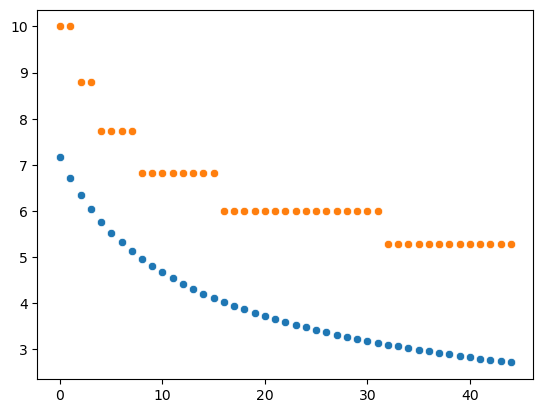

In [131]:
r1 = Roller(40, 100, 20)
r2 = Old_Roller(10)
for i in range(45):
    r1.roll()
    r2.roll()

sns.scatterplot(y=r1.rotations, x=[i for i in range(len(r1.rotations))])
sns.scatterplot(y=r2.rotations, x=[i for i in range(len(r2.rotations))])

In [71]:
import math
import time
import pandas as pd
import seaborn as sns

# Settings
TIME_START = 7  # Morning start hour
TIME_END = 19   # Evening stop hour

ROLLOUT_INTERVAL = 1  # Interval between rollouts, minutes
ROLLOUT_SPEED = 15    # mm per sec
ROLLOUT_LENGTH = 900  # mm

TOTAL_LENGTH = 28     # meters
OUTER_DIAMETER = 107  # mm
INNER_DIAMETER = 97   # mm
AVERAGE_THICKNESS = math.pi * ((OUTER_DIAMETER/2)**2 - (INNER_DIAMETER/2)**2) / (TOTAL_LENGTH * 1000)

STEPS_PER_REV = 1600  # Motor & driver steps per rev

# Global Variables
RADIUS_CURRENT = 10

In [72]:
pulse_widths = []
rotations = []

In [73]:
def roll_film(pulse_width, rotation):
    # Implementation of rollFilm function would go here
    pulse_widths.append(pulse_width)
    rotations.append(rotation)

In [74]:
for i in range(100):
    # Calculate pulse width in microseconds
    pulse_width = 2 * math.pi / ROLLOUT_SPEED * RADIUS_CURRENT / STEPS_PER_REV / 2 * 1e6
    
    # Calculate number of rotations needed
    rotation = ROLLOUT_LENGTH / (RADIUS_CURRENT * 2 * math.pi)
    
    # Roll the film
    roll_film(pulse_width, rotation)
    
    # Update current radius
    RADIUS_CURRENT = math.sqrt(ROLLOUT_LENGTH * AVERAGE_THICKNESS / math.pi + RADIUS_CURRENT**2)

<Axes: >

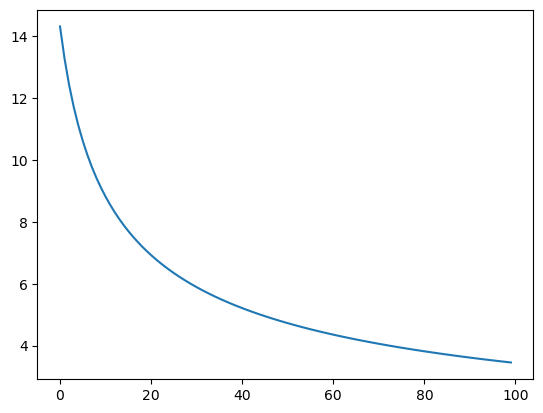

In [75]:
sns.lineplot(y=rotations, x = [i for i in range(100)])

In [76]:
rotations

[14.32394487827058,
 13.276985364372942,
 12.43045323513987,
 11.727607407193508,
 11.131916578319098,
 10.618656265904635,
 10.170416042958431,
 9.774533847341335,
 9.421550980373723,
 9.10424020000566,
 8.816971511671445,
 8.555285207879301,
 8.315596596539903,
 8.094986959602384,
 7.891052478518668,
 7.701793039945657,
 7.525529048890809,
 7.3608382766544525,
 7.206507279896366,
 7.06149357726191,
 6.924895877136821,
 6.795930406515694,
 6.673911916383272,
 6.558238309534266,
 6.448378101719612,
 6.3438601189299755,
 6.244264974307791,
 6.149217972442998,
 6.058383166879786,
 5.9714583556848595,
 5.88817084495172,
 5.8082738447506275,
 5.7315433888886425,
 5.657775690821636,
 5.58678486456188,
 5.5184009524920485,
 5.452468212408993,
 5.388843624467124,
 5.32739558541956,
 5.268002763008016,
 5.210553087794129,
 5.154942863360698,
 5.101075978801023,
 5.048863209884013,
 4.998221597331001,
 4.949073892346096,
 4.901348060968042,
 4.854976840008303,
 4.809897338347963,
 4.76605067821

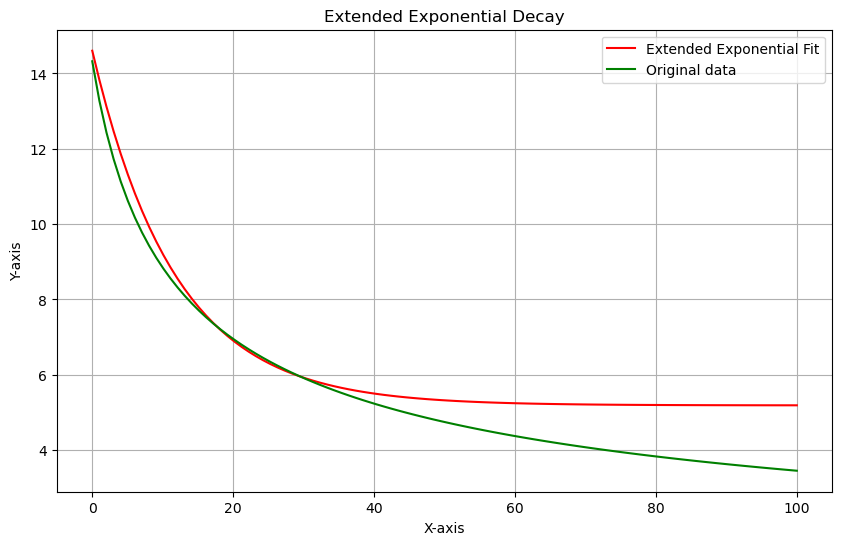

In [77]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Generate extended x values (0 to 100)
x_extended = np.linspace(0, 100, 100)

# Use the fitted parameters from earlier
a, b, c = 9.418, 0.085, 5.186
y_extended = exp_decay(x_extended, a, b, c)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_extended, y_extended, 'r-', label='Extended Exponential Fit')
plt.plot(x_extended, rotations, 'g-', label='Original data')
plt.grid(True)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Extended Exponential Decay')
plt.legend()
plt.show()